In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
N = 10
SIZE = N*N
MAX_STEPS = SIZE
M = 20
EPISODES = 1000
ALPHA = 0.8
LAMBDA = 0.8
INT_MIN = -99999

In [179]:
def reward(ele):
    if ele == 0:
        return -100
    elif ele == 1 or ele == -1:
        return 0
    elif ele == -2:
        return 100

In [163]:
#return statement right 0, down 1, left 2, up 3
def chooseAction(matrix, statec, Q):
    j = [1, 0, -1, 0]
    i = [0, 1, 0, -1]
    ls = []
    for k in range(4):
        idx = statec[0] + i[k]
        idy = statec[1] + j[k]
        #checking the range of indices in the matrix
        if(idx  >=0 and idx <=N-1 and idy >=0 and idy  <=N-1):
            ls.append(Q[idx, idy, k])
        else:
            ls.append(INT_MIN)
    return (statec[0] + i[np.argmax(ls)], statec[1] + j[np.argmax(ls)]), np.argmax(ls)

In [57]:
chooseAction(matrix, (N-1, N-1), Q)

((3, 2), 2)

In [192]:
np.random.seed(41)
#making matrix representing hole and frozen lake
#0 represent hole, 1 represent frozen lake, -1 represent start, -2 repesent terminal
a = np.ones(SIZE - M - 2) #-2 for start and terminal
b = np.zeros(M)
c = np.hstack((a, b))
np.random.shuffle(c)
start = -1
end = -2
matrix = np.hstack((start, c, end)).reshape(N, N)
matrix_new = matrix

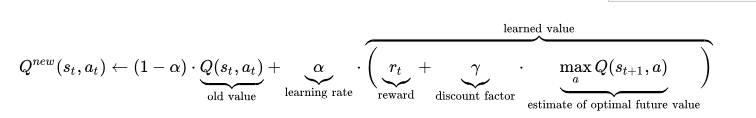

In [172]:
matrix

array([[-1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1., -2.]])

In [182]:
#Q(s, a) matrix which is initially zero and of size N X N X 4
#there are four actions right left up down
#action right  = 0, down  = 1, left = 2, up = 3
Q = np.zeros((N, N, 4))
rewardList = []
for epochs in range(EPISODES):
    #i, j represent indices
    statec = (0, 0)#current state
    total_reward = 0
    for steps in range(MAX_STEPS):
        print(statec, total_reward)
        if(statec == (N-1, N-1)):
            break
        #choose current action with maximum Q value
        statenew, actionc = chooseAction(matrix, statec, Q)
        #print(statenew)
        stateflag, actionprime = chooseAction(matrix, statenew, Q)
        #update the Q table
        first_part = (1-ALPHA)*Q[statec[0], statec[1], actionc]
        second_part = ALPHA*(reward(matrix[statenew[0], statenew[1]])   + LAMBDA*Q[statenew[0], statenew[1], actionprime])
        Q[statec[0], statec[1], actionc] =  first_part + second_part
        #adding reward
        total_reward += reward(matrix[statenew[0], statenew[1]])
        statec = statenew
    rewardList.append(total_reward)
    print("Episode" , epochs , "Complete")

(0, 0) 0
(0, 1) 0
(0, 2) -100
(0, 3) -200
(0, 4) -200
(0, 5) -300
(0, 6) -300
(0, 7) -300
(0, 8) -300
(0, 9) -300
(1, 9) -300
(2, 9) -400
(3, 9) -400
(4, 9) -400
(5, 9) -400
(6, 9) -400
(7, 9) -400
(8, 9) -400
(9, 9) -300
Episode 0 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(1, 3) -100
(1, 4) -100
(1, 5) -100
(1, 6) -200
(1, 7) -200
(1, 8) -200
(1, 9) -200
(2, 9) -300
(3, 9) -300
(4, 9) -300
(5, 9) -300
(6, 9) -300
(7, 9) -300
(8, 9) -300
(9, 9) -200
Episode 1 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(1, 3) -100
(1, 4) -100
(2, 4) -100
(2, 5) -100
(2, 6) -100
(2, 7) -100
(2, 8) -100
(2, 9) -200
(3, 9) -200
(4, 9) -200
(5, 9) -200
(6, 9) -200
(7, 9) -200
(8, 9) -200
(9, 9) -100
Episode 2 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(1, 3) -100
(1, 4) -100
(2, 4) -100
(2, 5) -100
(2, 6) -100
(2, 7) -100
(3, 7) -200
(3, 8) -200
(3, 9) -200
(4, 9) -200
(5, 9) -200
(6, 9) -200
(7, 9) -200
(8, 9) -200
(9, 9) -100
Episode 3 Complete
(0, 0) 0
(1, 0) -100
(1, 1)

(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 42 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 43 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 44 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 45 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -

(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 86 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 87 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 88 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 89 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -

(8, 9) -100
(9, 9) 0
Episode 134 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 135 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 136 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 137 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode

(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 183 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 184 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 185 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 186 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 

(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 232 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 233 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 234 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 235 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 

(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 288 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 289 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 290 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 291 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 

(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 342 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 343 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 344 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 345 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 

(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 401 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 402 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 403 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 404 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 

(8, 9) -100
(9, 9) 0
Episode 451 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 452 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 453 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 454 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode

(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 512 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 513 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 514 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 515 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 

(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 549 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 550 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 551 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 552 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 

(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 588 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 589 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 590 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 591 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 

(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 636 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 637 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 638 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 639 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 

(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 695 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 696 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 697 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 698 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 

(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 744 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 745 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 746 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 747 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 

(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 786 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 787 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 788 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 789 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 

(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 832 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 833 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 834 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 835 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 

(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 890 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 891 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 892 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 893 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 

(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 944 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 945 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 946 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 947 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 

(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 988 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 989 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 990 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 3) -100
(5, 4) -100
(5, 5) -100
(5, 6) -100
(5, 7) -100
(5, 8) -100
(5, 9) -100
(6, 9) -100
(7, 9) -100
(8, 9) -100
(9, 9) 0
Episode 991 Complete
(0, 0) 0
(1, 0) -100
(1, 1) -100
(1, 2) -100
(2, 2) -100
(2, 3) -100
(3, 3) -100
(4, 3) -100
(5, 

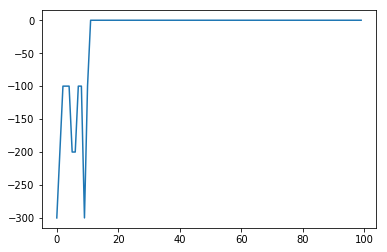

In [198]:
plt.plot(range(EPISODES)[0:100], rewardList[0:100])

In [197]:
matrix

array([[-1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 8.,  8.,  8.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  8.,  8.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  8.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  8.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  8.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  8.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  8.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  8.]])

In [196]:
matrix

array([[-1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 8.,  8.,  8.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  8.,  8.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  8.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  8.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  8.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  8.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  8.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  8.]])

In [194]:
statec = (0, 0)#current state
while(True):
    print(statec, "->")
    if(statec == (N-1, N-1)):
        break
    #choose current action with maximum Q value
    statenew, actionc = chooseAction(matrix, statec, Q)
    matrix_new[statenew[0], statenew[1]] = 8
    statec = statenew

(0, 0) ->
(1, 0) ->
(1, 1) ->
(1, 2) ->
(2, 2) ->
(2, 3) ->
(3, 3) ->
(4, 3) ->
(5, 3) ->
(5, 4) ->
(5, 5) ->
(5, 6) ->
(5, 7) ->
(5, 8) ->
(5, 9) ->
(6, 9) ->
(7, 9) ->
(8, 9) ->
(9, 9) ->


In [ ]:
matrix